In [4]:
import pandas as pd
import numpy as np
df = pd.read_csv('car_prices.csv')
df.head(3)

FileNotFoundError: [Errno 2] No such file or directory: 'car_prices.csv'

In [3]:
from matplotlib import pyplot as plt

plt.figure(figsize = (8, 6))
plt.scatter(df.mileage, df.selling_price)
plt.show()

SyntaxError: unterminated string literal (detected at line 1) (3226349553.py, line 1)

In [3]:
from sklearn.model_selection import train_test_split

X = df[['mileage']]
y = df['selling_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [4]:
X.shape, X_test.shape

((300, 1), (60, 1))

In [5]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [6]:
X_train[:5]

,mileage
102,44504
108,43660
96,125151
294,64040
11,131324


In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train_poly, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [8]:
y_pred = model.predict(X_test_poly)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mse, r2

(3942449.042820213, 0.916145076991595)

In [9]:
x_range = np.linspace(X['mileage'].min(), X['mileage'].max(), 300).reshape(-1, 1)
x_range_poly = poly.transform(x_range)
y_range_pred = model.predict(x_range_poly)

C:\Users\Mitudru\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


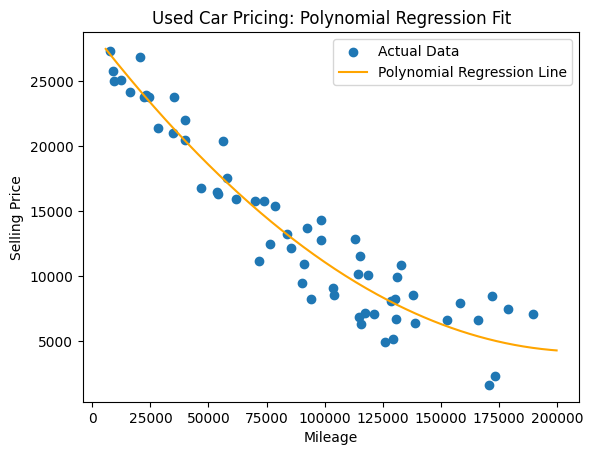

In [10]:
plt.scatter(X_test['mileage'], y_test, label='Actual Data')
plt.plot(x_range, y_range_pred, color= 'orange', label='Polynomial Regression Line')
plt.title('Used Car Pricing: Polynomial Regression Fit')
plt.xlabel('Mileage')
plt.ylabel('Selling Price')
plt.legend()
plt.show()